In [8]:
import pickle
import _pickle as cpickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from datetime import datetime
import matplotlib.dates as mdates
import scipy.signal as sps
import xarray as xr

%matplotlib inline

This notebook introduces a linear regression analysis between uptake and time and uptake and CO2 concentration using Peylin global integrated fluxes and a weighting of CO2 concentration.

UPTAKE: Use one model of fluxes. Use pickle of spatially integrated fluxes (which is essentially just flux data at monthly resolution.

CO2: In CO2 folder.

# Flux against time

In [9]:
fRayner = open('./../Output/output_raw/output_all/Rayner_all/year.pik', 'rb')
Rayner = pickle.load(fRayner)
Rayner

<xarray.Dataset>
Dimensions:         (time: 21)
Coordinates:
  * time            (time) object 1992-12-30 00:00:00 ... 2012-12-30 00:00:00
Data variables:
    Earth_Land      (time) float64 -2.447 -3.349 -0.7345 ... -4.192 -2.768
    South_Land      (time) float64 0.224 -0.3685 0.2921 ... -0.7236 -0.12
    Tropical_Land   (time) float64 -0.8121 -0.3696 0.5733 ... -0.5483 0.6304
    North_Land      (time) float64 -1.859 -2.611 -1.6 ... -2.7 -2.92 -3.279
    Earth_Ocean     (time) float64 -0.2522 1.241 0.113 ... 0.1794 -0.1197
    South_Ocean     (time) float64 0.5105 1.078 0.5778 ... 0.4099 0.6217 0.3392
    Tropical_Ocean  (time) float64 -0.4834 -0.01013 -0.4716 ... -0.3309 -0.3562
    North_Ocean     (time) float64 -0.2793 0.1733 0.006788 ... -0.1114 -0.1026

In [42]:
def cftime_to_datetime(time_array, format='%Y-%m'):
    '''
    Takes a xr.DataArray of cftime values and converts it to a list of datetimes.
    
    Variables
    ---
    time_array: xr.DataArray of cftime values.
    format: format of datetime.
    ---
    '''
    
    time_list = []
    for time in time_array.values:
        time_value = datetime.strptime(time.strftime('%Y-%m'), '%Y-%m')
        time_list.append(time_value)
    
    return time_list

In [44]:
Rayner_time = cftime_to_datetime(Rayner.time)
Rayner_time

[datetime.datetime(1992, 12, 1, 0, 0),
 datetime.datetime(1993, 12, 1, 0, 0),
 datetime.datetime(1994, 12, 1, 0, 0),
 datetime.datetime(1995, 12, 1, 0, 0),
 datetime.datetime(1996, 12, 1, 0, 0),
 datetime.datetime(1997, 12, 1, 0, 0),
 datetime.datetime(1998, 12, 1, 0, 0),
 datetime.datetime(1999, 12, 1, 0, 0),
 datetime.datetime(2000, 12, 1, 0, 0),
 datetime.datetime(2001, 12, 1, 0, 0),
 datetime.datetime(2002, 12, 1, 0, 0),
 datetime.datetime(2003, 12, 1, 0, 0),
 datetime.datetime(2004, 12, 1, 0, 0),
 datetime.datetime(2005, 12, 1, 0, 0),
 datetime.datetime(2006, 12, 1, 0, 0),
 datetime.datetime(2007, 12, 1, 0, 0),
 datetime.datetime(2008, 12, 1, 0, 0),
 datetime.datetime(2009, 12, 1, 0, 0),
 datetime.datetime(2010, 12, 1, 0, 0),
 datetime.datetime(2011, 12, 1, 0, 0),
 datetime.datetime(2012, 12, 1, 0, 0)]

## Whole period

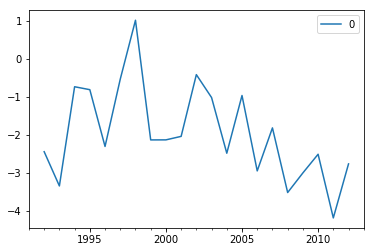

In [45]:
# Plot global land against time
pd.DataFrame(Rayner.Earth_Land.values, index=Rayner_time).plot()

In [59]:
int(Rayner_time[0].strftime(format='%Y'))

1992

In [62]:
Rayner_year = []
for time in Rayner_time:
    Rayner_year.append(float(time.strftime(format='%Y')))

In [74]:
list(Rayner.Earth_Land.values)

[-2.446948228042133,
 -3.34941021625888,
 -0.7344973091205665,
 -0.8119558949942292,
 -2.308522982448819,
 -0.5340008592791193,
 1.018407946567014,
 -2.1360877866354384,
 -2.135034793093321,
 -2.042849965823414,
 -0.41553199192534673,
 -1.019339283538535,
 -2.486873799410162,
 -0.9653138092898456,
 -2.9528609249637183,
 -1.819297696094968,
 -3.5229951464687903,
 -3.0063740701599233,
 -2.5140987491015307,
 -4.192337890211309,
 -2.7683636076007847]

In [76]:
# Linear regression: global land uptake vs. time
reg_land = stats.linregress(Rayner_year, Rayner.Earth_Land.values)
slope_land = reg_land[0]
intercept_land = reg_land[1]

line = slope_land*Rayner_year+intercept_land

plt.plot(Rayner_year, Rayner.Earth_Land)
plt.plot(Rayner_year, line, color ='r')
print(reg_land)

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

## Decade trend in regression

In [59]:
def decade_sel(decade):
    index_list = []
    for index, year in enumerate(Rayner.Year):
        if year in decade:
            index_list.append(index)
    return index_list

In [60]:
i = decade_sel(range(1992,2002))

LinregressResult(slope=0.07512226413579666, intercept=-151.5296903560309, rvalue=0.17990328581738482, pvalue=0.6189530752251279, stderr=0.1452246441528873)


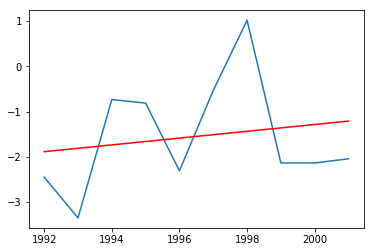

In [65]:
reg_land = stats.linregress(Rayner.Year[i], Rayner['earth_land_total'].astype(float)[i])
slope_land = reg_land[0]
intercept_land = reg_land[1]

line_i = slope_land*Rayner.Year[i]+intercept_land

plt.plot(Rayner.Year[i], Rayner.earth_land_total[i])
plt.plot(Rayner.Year[i], line_i, color ='r')
print(reg_land)

In [66]:
j = decade_sel(range(2002,2013))

LinregressResult(slope=-0.2653643827035239, intercept=530.2532809069938, rvalue=-0.7576571468639509, pvalue=0.006909484964205737, stderr=0.07619576660446957)


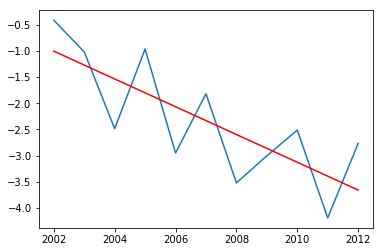

In [67]:
reg_land = stats.linregress(Rayner.Year[j], Rayner['earth_land_total'].astype(float)[j])
slope_land = reg_land[0]
intercept_land = reg_land[1]

line_j = slope_land*Rayner.Year[j]+intercept_land

plt.plot(Rayner.Year[j], Rayner.earth_land_total[j])
plt.plot(Rayner.Year[j], line_j, color ='r')
print(reg_land)

# Flux against CO2

## Weighting of Mount Loa and South Pole

### Month

In [92]:
ml_co2_month = pd.read_csv('./../co2_data/co2_mount_loa.csv')
so_co2_month = pd.read_csv('./../co2_data/co2_south_pole.csv')

In [93]:
ml_co2_month.CO2[ml_co2_month.CO2==-99.99]=np.nan
ml_co2_month = ml_co2_month.interpolate()

In [94]:
so_co2_month.CO2[so_co2_month.CO2==-99.99]=np.nan
so_co2_month = so_co2_month.interpolate()

In [95]:
co2_month = 0.75*ml_co2_month + 0.25*so_co2_month

In [96]:
co2_month.to_csv('weighted_co2_month.csv')

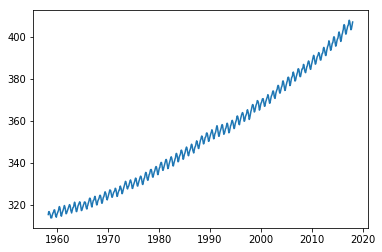

In [97]:
plt.plot(co2_month.Date, co2_month.CO2)

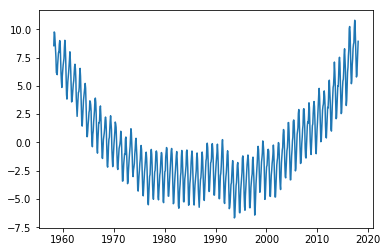

In [98]:
plt.plot(co2_month.Date, sps.detrend(co2_month.CO2))

### Year

In [132]:
co2_global = pd.read_csv('./../co2_data/co2_global.csv')
co2_global.set_index('Year', inplace=True)

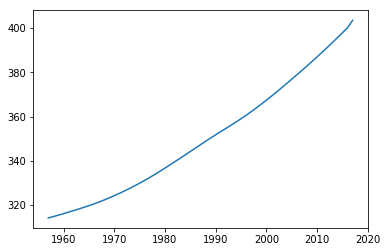

In [133]:
plt.plot(co2_global.index, co2_global.CO2)

## Whole period

In [136]:
co2_Rayner = co2_global.loc[1992:2012]

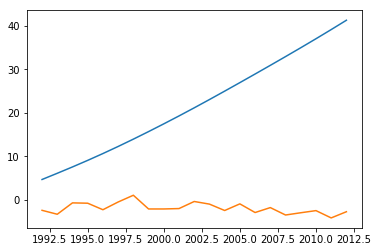

In [137]:
plt.plot(co2_Rayner.index, co2_Rayner.CO2-350)
plt.plot(co2_Rayner.index, Rayner.earth_land_total)

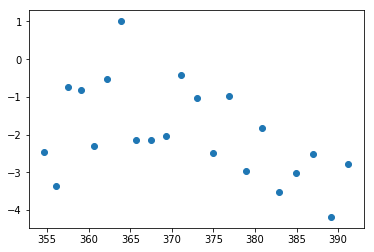

In [139]:
plt.scatter(co2_Rayner.CO2, Rayner['earth_land_total'])

LinregressResult(slope=-0.04920333235283116, intercept=16.333328835891322, rvalue=-0.45203788370398973, pvalue=0.039657817932484546, stderr=0.022274456918048136)


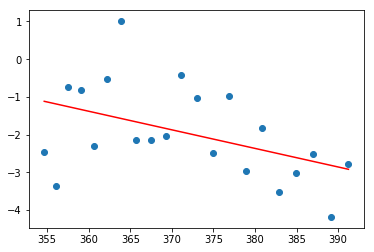

In [140]:
# Linear regression: global land uptake vs. time
reg_land = stats.linregress(co2_Rayner.CO2, Rayner['earth_land_total'].astype(float))
slope_land = reg_land[0]
intercept_land = reg_land[1]

line = slope_land*co2_Rayner.CO2+intercept_land

plt.scatter(co2_Rayner.CO2, Rayner.earth_land_total)
plt.plot(co2_Rayner.CO2, line, color ='r')
print(reg_land)

## Decade trend in regression

In [142]:
i = decade_sel(range(1992,2002))

In [153]:
Rayner

,Year,earth_land_total,south_land_total,trop_land_total,north_land_total,earth_ocean_total,south_ocean_total,trop_ocean_total,north_ocean_total
0,1992,-2.44695,0.224023,-0.81209,-1.85888,-0.252198,0.51051,-0.483421,-0.279286
1,1993,-3.34941,-0.368533,-0.369603,-2.61127,1.24133,1.07817,-0.0101273,0.173287
2,1994,-0.734497,0.292096,0.573278,-1.59987,0.112975,0.57777,-0.471583,0.00678795
3,1995,-0.811956,-0.244602,1.26042,-1.82777,0.225526,0.797611,-0.461935,-0.11015
4,1996,-2.30852,-0.238651,-0.371002,-1.69887,0.396192,0.74824,-0.334994,-0.017055
5,1997,-0.534001,0.393517,1.15454,-2.08206,-0.466631,0.221819,-0.617863,-0.0705875
6,1998,1.01841,0.683573,2.2621,-1.92727,-0.426082,0.18317,-0.629241,0.0199884
7,1999,-2.13609,0.0547002,0.197585,-2.38837,0.143578,0.500371,-0.428802,0.0720088
8,2000,-2.13503,-0.394168,0.295049,-2.03592,0.298124,0.549731,-0.291496,0.0398891
9,2001,-2.04285,-0.201406,0.290846,-2.13229,0.201494,0.691956,-0.46857,-0.0218921


In [143]:
reg_land = stats.linregress(co2_Rayner.loc[1992:2002].CO2, Rayner['earth_land_total'].astype(float)[i])
slope_land = reg_land[0]
intercept_land = reg_land[1]

line_ii = slope_land*co2_Rayner.loc[1992:2002].CO2+intercept_land

plt.scatter(co2_Rayner.CO2[i], Rayner.earth_land_total[i])
plt.plot(co2_Rayner.CO2[i], line_ii, color ='r')
print(reg_land)

KeyError: 'None of [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]] are in the [index]'

In [37]:
j = decade_sel(range(2002,2013))

LinregressResult(slope=-0.013089926820294754, intercept=4.816012558459486, rvalue=-0.2301249167799863, pvalue=0.007942307160194699, stderr=0.004854970973702247)


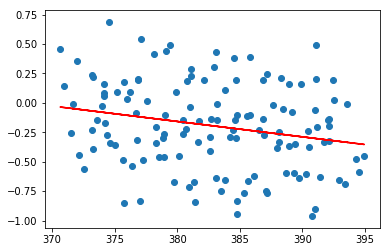

In [38]:
reg_land = stats.linregress(co2_Rayner.CO2[j], Rayner['earth_land_total'].astype(float)[j])
slope_land = reg_land[0]
intercept_land = reg_land[1]

line_jj = slope_land*co2_Rayner.CO2[j]+intercept_land

plt.scatter(co2_Rayner.CO2[j], Rayner.earth_land_total[j])
plt.plot(co2_Rayner.CO2[j], line_jj, color ='r')
print(reg_land)

### Linear regression anomaly plot: decades

0.3594069670015973


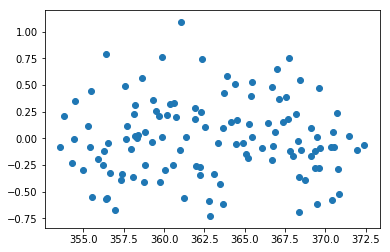

In [39]:
plt.scatter(co2_Rayner.CO2[i], Rayner.earth_land_total[i]-line_ii)
print((Rayner.earth_land_total[i]-line_ii).std())

0.359582518102512


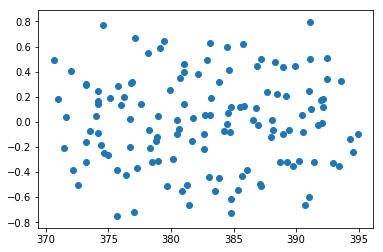

In [40]:
plt.scatter(co2_Rayner.CO2[j], Rayner.earth_land_total[j]-line_jj)
print((Rayner.earth_land_total[j]-line_jj).std())